In [96]:
# lib imports
import pandas as pd
import csv
from datetime import datetime 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
data_location = "Data/Spotify_Data_Sample.csv"

In [98]:
!pip install tensorflow

## Initial Data Cleaning

In [99]:
df = pd.read_csv(data_location)
df.head()

C:\Users\hmishra8\AppData\Local\Temp\ipykernel_15844\1761512478.py:1: DtypeWarning: Columns (136,137,138,141,143,144,146,149,151,152,154,157,159,160,162,165,167,168,170,173,175,176,178,181,183,184,186,189,191,192,194,197,199,200,202,205,207,208,210,213,215,216,218,221,223,224,226,229,231,232,234,237,239,240,242,245,247,248,250,253,255,256,258,261,263,264,266,269,271,272,274,277,279,280,282,285,287,288,290,293,295,296,298,301,303,304,306,309,311,312,314,317,319,320,322,325,327,328,330,333,335,336,338,341,343,344,346,349,351,352,354,357,359,360,362,365,367,368,370,373,375,376,378,381,383,384,386,389,391,392,394,397,399,400,402,405,407,408,410,413,415,416,418,421,423,424,425,426,429,431,432,434,437,439,440,442,445,447,448,450,453,455,456,458,461,463,464,466,469,471,472,474,477,479,480,482,485,487,488,490,493,495,496,498,501,503,504,506,509,511,512,514,517,519,520,522,525,527,528,530,533,535,536,538,541,543,544,546,549,551,552,554,557,559,560,562,565,567,568,569,570,573,575,576,577,578,581

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks/0/pos,tracks/0/artist_name,tracks/0/track_uri,...,Unnamed: 2001,Unnamed: 2002,Unnamed: 2003,Unnamed: 2004,Unnamed: 2005,Unnamed: 2006,Unnamed: 2007,Unnamed: 2008,Unnamed: 2009,Unnamed: 2010
0,Throwbacks,False,0,1493424000,52,47,1,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Awesome Playlist,False,1,1506556800,39,23,1,0,Survivor,spotify:track:2HHtWyy5CgaQbC7XSoOb0e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,korean,False,2,1505692800,64,51,1,0,Hoody,spotify:track:74tqql9zP6JjF5hjkHHUXp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mat,False,3,1501027200,126,107,1,0,Camille Saint-Saëns,spotify:track:4WJ7UMD4i6DOPzyXU5pZSz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90s,False,4,1401667200,17,16,2,0,The Smashing Pumpkins,spotify:track:4iCGSi1RonREsPtfEKYj5b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
desired_columns = ['name',
 'collaborative',
 'pid',
 'modified_at',
 'num_albums',
 'num_tracks',
 'num_edits',
 'duration_ms',
 'num_artists',
 'num_followers']



In [101]:
df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks/0/pos,tracks/0/artist_name,tracks/0/track_uri,...,Unnamed: 2001,Unnamed: 2002,Unnamed: 2003,Unnamed: 2004,Unnamed: 2005,Unnamed: 2006,Unnamed: 2007,Unnamed: 2008,Unnamed: 2009,Unnamed: 2010
0,Throwbacks,False,0,1493424000,52,47,1,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Awesome Playlist,False,1,1506556800,39,23,1,0,Survivor,spotify:track:2HHtWyy5CgaQbC7XSoOb0e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,korean,False,2,1505692800,64,51,1,0,Hoody,spotify:track:74tqql9zP6JjF5hjkHHUXp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mat,False,3,1501027200,126,107,1,0,Camille Saint-Saëns,spotify:track:4WJ7UMD4i6DOPzyXU5pZSz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90s,False,4,1401667200,17,16,2,0,The Smashing Pumpkins,spotify:track:4iCGSi1RonREsPtfEKYj5b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Feeling Good,False,5995,1426809600,18,16,1,0,Nina Simone,spotify:track:61S0mEfdRtJ62Fc7fPqx0U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,Frost,False,5996,1427068800,67,61,1,0,Slow Magic,spotify:track:4jC2ifws6KbDoXBTkSQiPr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,Kenya,False,5997,1384646400,29,28,2,0,Blood Orange,spotify:track:2iR4oHXi5qsb17b0KHVpon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,17-Aug,False,5998,1504224000,66,64,1,0,Big Sean,spotify:track:1jQsKN68yE94tMYml0wHMd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df = df[desired_columns]

Data Description
```
name: string
collaborative: boolean -> bit
pid: Number
modified_at: date
num_albums: Number
num_tracks: Number
num_edits: Number
duration_ms: Number
num_artist: Number
num_followers: Number -> Target
```

## Data Cleaning

In [103]:
# Initial types
df.dtypes

name             object
collaborative      bool
pid               int64
modified_at       int64
num_albums        int64
num_tracks        int64
num_edits        object
duration_ms      object
num_artists      object
num_followers     int64
dtype: object

In [104]:
df.loc[:, 'name'] = df['name'].astype(str)

In [105]:
# Type casting the columns
df.loc[:, 'name'] = df['name'].astype(str)
df.loc[:, 'collaborative'] = df['collaborative'].astype(bool)
df.loc[:, 'pid'] = df['pid'].astype(int)

# Date conversions
df.loc[:, 'modified_at'] = pd.to_datetime(df['modified_at'], unit='s')
df.loc[:, 'year'] = df['modified_at'].dt.year
df.loc[:, 'month'] = df['modified_at'].dt.month

# Other numeric conditions
df.loc[:, 'num_albums'] = df['num_albums'].astype(int)
df.loc[:, 'num_tracks'] = df['num_tracks'].astype(int)

# Will impute the non-numeric values to NaN using coerce
df.loc[:, 'num_edits'] = pd.to_numeric(df['num_edits'], errors='coerce')
df.loc[:, 'duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df.loc[:, 'num_artists'] = pd.to_numeric(df['num_artists'], errors='coerce')
df.loc[:, 'num_followers'] = pd.to_numeric(df['num_followers'], errors='coerce')


C:\Users\hmishra8\AppData\Local\Temp\ipykernel_15844\974672982.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2017-04-29 00:00:00', '2017-09-28 00:00:00', '2017-09-18 00:00:00',
 '2017-07-26 00:00:00', '2014-06-02 00:00:00', '2015-05-07 00:00:00',
 '2016-10-22 00:00:00', '2017-10-30 00:00:00', '2017-10-26 00:00:00',
 '2017-08-04 00:00:00',
 ...
 '2017-05-26 00:00:00', '2017-06-19 00:00:00', '2016-05-23 00:00:00',
 '2017-09-08 00:00:00', '2016-03-06 00:00:00', '2015-03-20 00:00:00',
 '2015-03-23 00:00:00', '2013-11-17 00:00:00', '2017-09-01 00:00:00',
 '2017-09-25 00:00:00']
Length: 5000, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'modified_at'] = pd.to_datetime(df['modified_at'], unit='s')
C:\Users\hmishra8\AppData\Local\Temp\ipykernel_15844\974672982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [106]:
for col in df.columns:
    print(f"col: {col} \ntype: {df[col].dtypes} \n+++++++++++++++++")

col: name 
type: object 
+++++++++++++++++
col: collaborative 
type: bool 
+++++++++++++++++
col: pid 
type: int64 
+++++++++++++++++
col: modified_at 
type: datetime64[ns] 
+++++++++++++++++
col: num_albums 
type: int64 
+++++++++++++++++
col: num_tracks 
type: int64 
+++++++++++++++++
col: num_edits 
type: object 
+++++++++++++++++
col: duration_ms 
type: object 
+++++++++++++++++
col: num_artists 
type: object 
+++++++++++++++++
col: num_followers 
type: int64 
+++++++++++++++++
col: year 
type: int32 
+++++++++++++++++
col: month 
type: int32 
+++++++++++++++++


In [107]:
# Dropping the column for redundant info
print(df.columns)
df = df.drop(['modified_at'], axis=1)
print(df.columns)

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_albums',
       'num_tracks', 'num_edits', 'duration_ms', 'num_artists',
       'num_followers', 'year', 'month'],
      dtype='object')
Index(['name', 'collaborative', 'pid', 'num_albums', 'num_tracks', 'num_edits',
       'duration_ms', 'num_artists', 'num_followers', 'year', 'month'],
      dtype='object')


In [108]:
df.head()

,name,collaborative,pid,num_albums,num_tracks,num_edits,duration_ms,num_artists,num_followers,year,month
0,Throwbacks,False,0,47,52,6.0,11532414.0,37.0,1,2017,4
1,Awesome Playlist,False,1,23,39,5.0,11656470.0,21.0,1,2017,9
2,korean,False,2,51,64,18.0,14039958.0,31.0,1,2017,9
3,mat,False,3,107,126,4.0,28926058.0,86.0,1,2017,7
4,90s,False,4,16,17,7.0,4335282.0,16.0,2,2014,6


```
We have to normalize the data because :
    1. Regression models are sensitive to scale of numbers
    2. y = mx + b :- can scale any factor
```

In [109]:
cols = ['name', 'collaborative', 'pid', 'num_albums', 'num_tracks', 'num_edits',
       'duration_ms', 'num_artists', 'num_followers', 'year', 'month']
for col in cols:
    print(f"column: {col}, data: {df[col].describe()}")
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++\n")

column: name, data: count        5000
unique       3356
top       Country
freq           77
Name: name, dtype: object

+++++++++++++++++++++++++++++++++++++++++++++++++

column: collaborative, data: count      5000
unique        2
top       False
freq       4885
Name: collaborative, dtype: object

+++++++++++++++++++++++++++++++++++++++++++++++++

column: pid, data: count    5000.000000
mean     3099.500000
std      1877.242141
min         0.000000
25%      1249.750000
50%      3499.500000
75%      4749.250000
max      5999.000000
Name: pid, dtype: float64

+++++++++++++++++++++++++++++++++++++++++++++++++

column: num_albums, data: count    5000.000000
mean       50.103000
std        39.882399
min         2.000000
25%        20.000000
50%        38.000000
75%        69.000000
max       233.000000
Name: num_albums, dtype: float64

+++++++++++++++++++++++++++++++++++++++++++++++++

column: num_tracks, data: count    5000.000000
mean       67.253400
std        54.011949
min         5.000

In [110]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    
    imputer = SimpleImputer(strategy='mean')
    
    for col in df.columns:
        if df[col].isnull().any():
            df[col] = imputer.fit_transform(df[[col]])
    
    return df

In [111]:
df_imputed = impute_missing_values(df)
df_imputed.tail()

Missing Values:
name                0
collaborative       0
pid                 0
num_albums          0
num_tracks          0
num_edits        2537
duration_ms      3514
num_artists      3993
num_followers       0
year                0
month               0
dtype: int64


,name,collaborative,pid,num_albums,num_tracks,num_edits,duration_ms,num_artists,num_followers,year,month
4995,Feeling Good,False,5995,16,18,38.011368,1.066928e+07,45.936445,1,2015,3
4996,Frost,False,5996,61,67,52.000000,1.066928e+07,45.936445,1,2015,3
4997,Kenya,False,5997,28,29,38.011368,1.066928e+07,45.936445,2,2013,11
4998,17-Aug,False,5998,64,66,52.000000,1.066928e+07,45.936445,1,2017,9
4999,Cardio,False,5999,53,93,52.000000,1.066928e+07,45.936445,1,2017,9


In [112]:
df_imputed.isnull().sum()

name             0
collaborative    0
pid              0
num_albums       0
num_tracks       0
num_edits        0
duration_ms      0
num_artists      0
num_followers    0
year             0
month            0
dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_features(df):
    # Initialize scalers
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()
    
    # Determine which columns are numerical
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Iterate through numerical columns
    for col in numerical_cols:
        if col == "num_followers":
            continue
        # Check the skewness of the column
        skewness = df[col].skew()
        
        # If the skewness is greater than 1, apply standardization
        if abs(skewness) > 1:
            df[col] = standard_scaler.fit_transform(df[[col]])
            print(f"Standardizing column '{col}' with skewness {skewness}")
        # If the skewness is less than -1, apply standardization
        elif abs(skewness) < -1:
            df[col] = standard_scaler.fit_transform(df[[col]])
            print(f"Standardizing column '{col}' with skewness {skewness}")
        # Otherwise, apply normalization
        else:
            df[col] = minmax_scaler.fit_transform(df[[col]])
            print(f"Normalizing column '{col}' with skewness {skewness}")
    
    return df


In [44]:
df_scaled = scale_features(df_imputed)
df_scaled.tail(10)

Normalizing column 'pid' with skewness -0.1524615277708803
Standardizing column 'num_albums' with skewness 1.3454491536100928
Standardizing column 'num_tracks' with skewness 1.2420950122543892
Normalizing column 'num_edits' with skewness -0.47321830692397343
Standardizing column 'duration_ms' with skewness 2.7672838635438413
Standardizing column 'num_artists' with skewness 57.7461050125374


,name,collaborative,pid,num_albums,num_tracks,num_edits,duration_ms,num_artists,num_followers,year,month
4990,Friday Afternoon,False,0.998500,-0.905327,-0.986055,0.204610,-2.660756e-16,0.0,1,2017,5
4991,NEW NEW,False,0.998666,0.248179,0.198987,0.284091,-2.660756e-16,0.0,1,2017,6
4992,chill songs,False,0.998833,-1.080861,-1.115668,0.204610,-2.660756e-16,0.0,1,2016,5
4993,benny,False,0.999000,-0.754870,-0.800892,0.204610,-2.660756e-16,0.0,4,2017,9
4994,New,False,0.999167,-0.855175,-0.874957,0.204610,-2.660756e-16,0.0,2,2016,3
4995,Feeling Good,False,0.999333,-0.855175,-0.911989,0.204610,-2.660756e-16,0.0,1,2015,3
4996,Frost,False,0.999500,0.273256,-0.004692,0.284091,-2.660756e-16,0.0,1,2015,3
4997,Kenya,False,0.999667,-0.554260,-0.708310,0.204610,-2.660756e-16,0.0,2,2013,11
4998,17-Aug,False,0.999833,0.348484,-0.023208,0.284091,-2.660756e-16,0.0,1,2017,9
4999,Cardio,False,1.000000,0.072646,0.476731,0.284091,-2.660756e-16,0.0,1,2017,9


In [113]:
# Step 1: Handling missing values
df = df_imputed
imputer = SimpleImputer(strategy='mean')
df['num_followers'] = imputer.fit_transform(df[['num_followers']])

In [114]:
# Step 2: Encoding categorical variables (if necessary)
# For this example, we don't have categorical variables that need encoding

# Step 3: Scaling/Normalization (if necessary)
# For linear regression, scaling is typically recommended
scaler = StandardScaler()
numerical_cols = ['pid', 'num_albums', 'num_tracks', 'num_edits', 'duration_ms', 'num_artists', 'year', 'month']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [115]:
# Step 4: Splitting the data into training and testing sets
X = df.drop(columns=['num_followers', 'name', 'pid'])  # Features
y = df['num_followers']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Step 5: Fitting a regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)
y_pred

array([1.69326349, 1.62783032, 1.46003274, 1.51300502, 1.2880508 ,
       1.66410798, 1.61769919, 1.43771301, 2.11180113, 1.29639671,
       1.92799603, 2.24374058, 1.18086578, 1.29992721, 1.83120447,
       1.82592904, 2.01683571, 2.16022304, 1.4834329 , 1.9147749 ,
       1.43111125, 1.68727436, 1.97339195, 1.68120365, 1.71571171,
       1.29331094, 1.56871489, 1.51738817, 1.95436148, 1.23924175,
       1.85174722, 1.46914053, 1.66727669, 1.88527965, 1.3328901 ,
       1.45896545, 1.39633623, 1.58585587, 1.72653254, 1.88694023,
       1.54667926, 1.32789138, 1.344334  , 1.74894864, 1.86483379,
       1.28976145, 1.32287955, 1.43968994, 2.35720857, 1.49428561,
       1.83965001, 1.61116554, 1.95841471, 1.50530248, 1.68777637,
       1.40188171, 1.86766877, 1.33817091, 1.60884431, 1.35880743,
       1.39887589, 1.39638122, 1.34142542, 1.38758897, 1.22073331,
       1.76401939, 1.4471383 , 1.48114739, 1.39498293, 1.45731953,
       1.433669  , 1.35966684, 1.50008966, 1.31736379, 2.07566

In [118]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1084.7723150108588


In [119]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1.8963550617893703
R-squared (R2): -0.0010965822008437431


In [120]:
# Create a DataFrame to visualize input features, actual values, and predicted values
results_df = pd.DataFrame({
    'num_albums': X_test['num_albums'],
    'num_tracks': X_test['num_tracks'],
    'num_edits': X_test['num_edits'],
    'duration_ms': X_test['duration_ms'],
    'num_artists': X_test['num_artists'],
    'year': X_test['year'],
    'month': X_test['month'],
    'Actual_num_followers': y_test,
    'Predicted_num_followers': y_pred
})

# Display the DataFrame
print("\nInput Features, Actual Values, and Predicted Values:")
print(results_df.head())


Input Features, Actual Values, and Predicted Values:
      num_albums  num_tracks  num_edits   duration_ms  num_artists      year  \
1501    0.498942    0.439699   0.924483 -2.660756e-16     0.000000  0.699030   
2586   -0.027659   -0.189855   0.000000 -1.490008e+00     0.000000 -0.185147   
2653   -0.629488   -0.689794   0.000000 -2.660756e-16     0.000000 -1.069323   
1055   -0.729793   -0.689794   0.000000 -2.660756e-16     0.000000 -1.069323   
705    -0.704717   -0.819408  -1.520779 -7.234562e-01    -0.368037 -0.185147   

         month  Actual_num_followers  Predicted_num_followers  
1501 -0.123611                   1.0                 1.693263  
2586 -1.755220                   2.0                 1.627830  
2653  0.529033                   1.0                 1.460033  
1055 -1.102576                   1.0                 1.513005  
705   1.507999                   1.0                 1.288051  


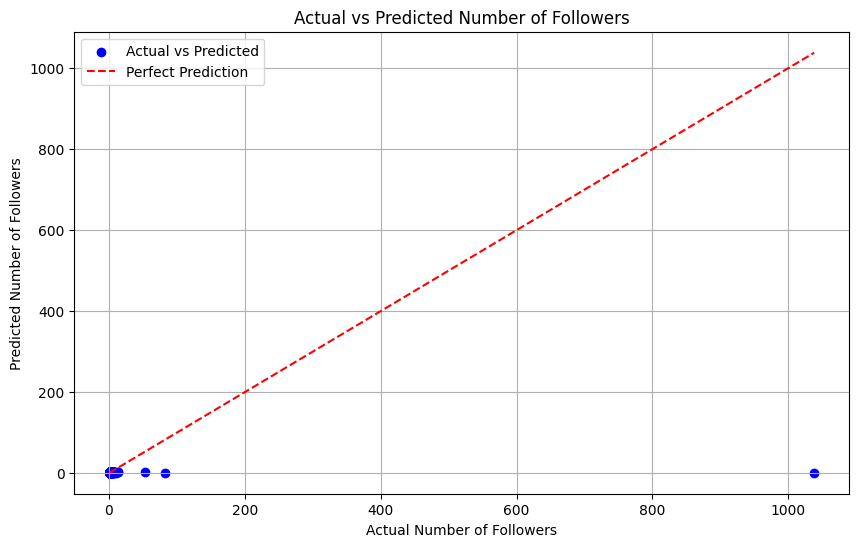

In [121]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Number of Followers')
plt.xlabel('Actual Number of Followers')
plt.ylabel('Predicted Number of Followers')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree Regression Model Evaluation:
Mean Squared Error (MSE): 1092.31825
Mean Absolute Error (MAE): 2.0795
R-squared (R2): -0.008060448832214462


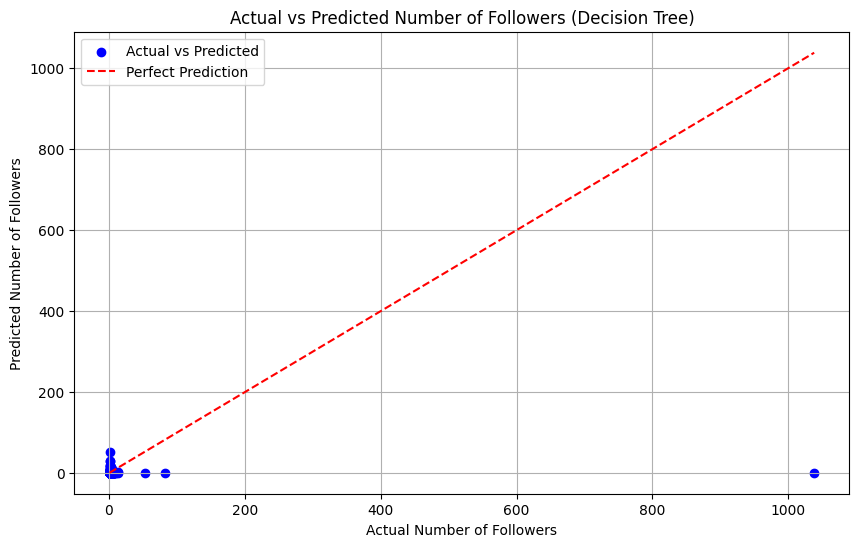

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined from previous code snippets

# Create a Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_regressor.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression Model Evaluation:')
print(f'Mean Squared Error (MSE): {mse_tree}')
print(f'Mean Absolute Error (MAE): {mae_tree}')
print(f'R-squared (R2): {r2_tree}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Number of Followers (Decision Tree)')
plt.xlabel('Actual Number of Followers')
plt.ylabel('Predicted Number of Followers')
plt.legend()
plt.grid(True)
plt.show()


KNN Regression Model Evaluation:
Mean Squared Error (MSE): 1087.0031999999997
Mean Absolute Error (MAE): 1.9
R-squared (R2): -0.0031553841328322285


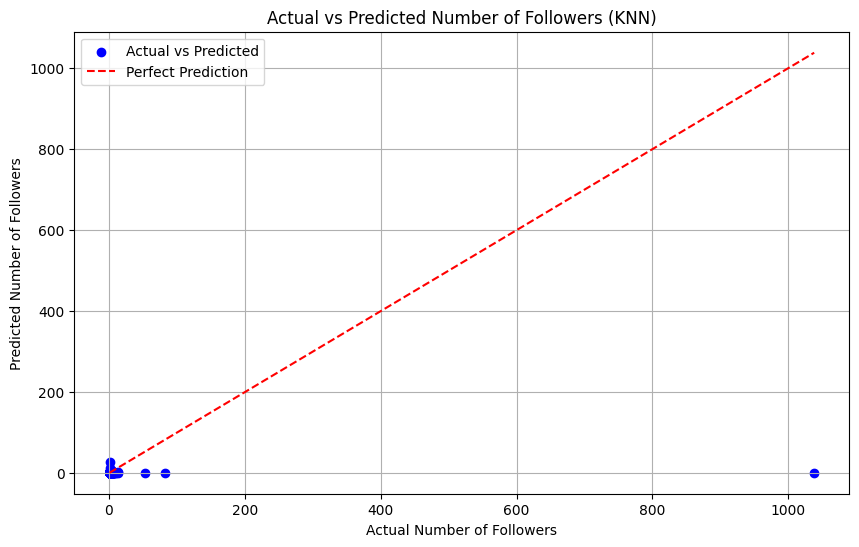

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined from previous code snippets

# Create a KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors (K) to 5

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN Regression Model Evaluation:')
print(f'Mean Squared Error (MSE): {mse_knn}')
print(f'Mean Absolute Error (MAE): {mae_knn}')
print(f'R-squared (R2): {r2_knn}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Number of Followers (KNN)')
plt.xlabel('Actual Number of Followers')
plt.ylabel('Predicted Number of Followers')
plt.legend()
plt.grid(True)
plt.show()


SVR Model Evaluation:
Mean Squared Error (MSE): 1085.8772874310766
Mean Absolute Error (MAE): 1.6709872227772222
R-squared (R2): -0.002116320719239617


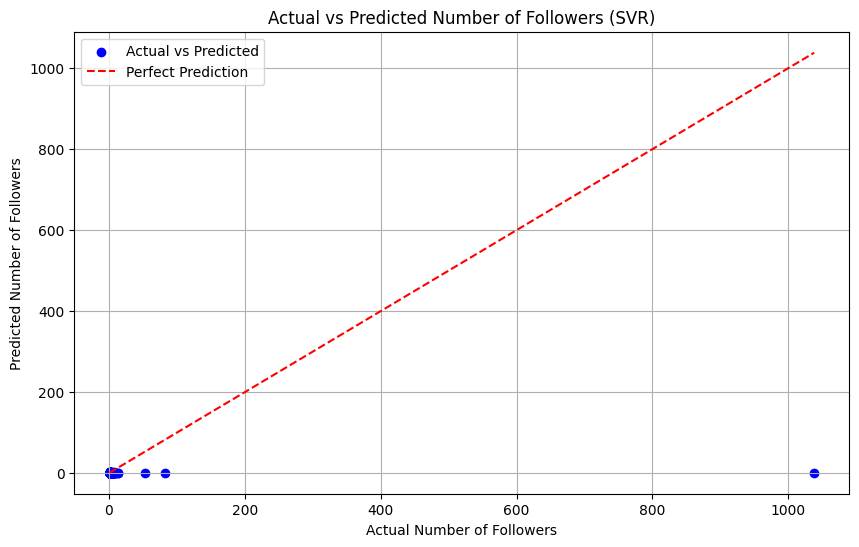

In [124]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined from previous code snippets

# Create an SVR model
svr_model = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel as an example

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Model Evaluation:')
print(f'Mean Squared Error (MSE): {mse_svr}')
print(f'Mean Absolute Error (MAE): {mae_svr}')
print(f'R-squared (R2): {r2_svr}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Number of Followers (SVR)')
plt.xlabel('Actual Number of Followers')
plt.ylabel('Predicted Number of Followers')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50


C:\Users\hmishra8\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.7005 - val_loss: 1060.4669
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2704 - val_loss: 1060.5675
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7603 - val_loss: 1060.3477
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7668 - val_loss: 1060.3613
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0380 - val_loss: 1060.5796
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7701 - val_loss: 1060.4149
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8799 - val_loss: 1060.4794
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0093 - val_loss: 1059.9875
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9859 - val_loss: 1060.3978
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3088 - val_loss: 1060.3679
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2964 - val_loss: 1060.3936
Epoch 12/50
125/125 ━━━━

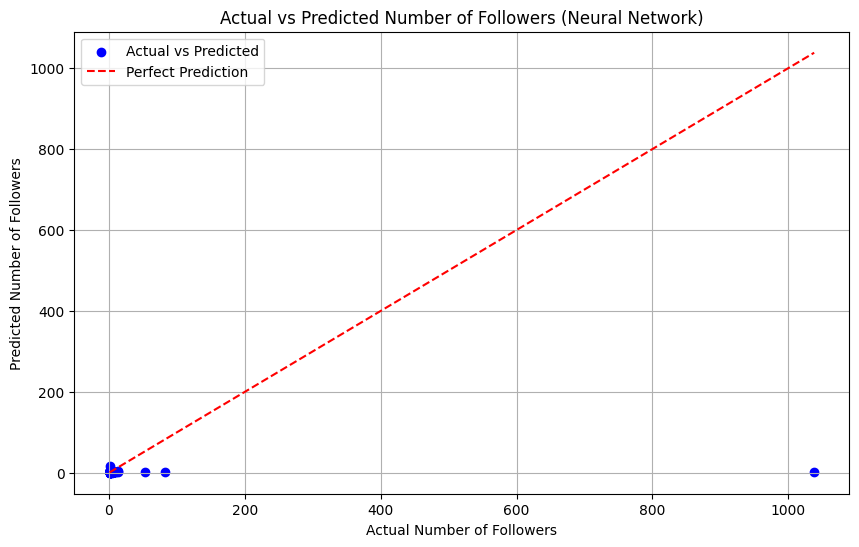

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined from previous code snippets

# Create a Sequential model
model = Sequential()

# Add input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Assuming 64 neurons in the first hidden layer

# Add hidden layers
model.add(Dense(32, activation='relu'))  # Adding a hidden layer with 32 neurons and ReLU activation
model.add(Dense(16, activation='relu'))  # Adding another hidden layer with 16 neurons and ReLU activation

# Add output layer
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')  # Using mean squared error loss and Adam optimizer

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Model Evaluation:')
print(f'Mean Squared Error (MSE): {mse_nn}')
print(f'Mean Absolute Error (MAE): {mae_nn}')
print(f'R-squared (R2): {r2_nn}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Number of Followers (Neural Network)')
plt.xlabel('Actual Number of Followers')
plt.ylabel('Predicted Number of Followers')
plt.legend()
plt.grid(True)
plt.show()